# Movie Ratings Analysis: Critics vs. Audience 

### This project analyzes a comprehensive dataset about Rotten Tomatoes Movie Ratings to explore patterns in ratings, genres, studios, and audience behavior. Using Python data visualizations and statistical methods, the project examines the distribution and relationship of critic and audience ratings, differences across MPAA categories, genre-based patterns, and how factors like runtime and studio influence reception.

# Data Card 

## Rotten Tomatoes Movie Rating
> Dataset origin: Kaggle
> - Source: https://www.kaggle.com/datasets/subhajournal/movie-rating
> - Fields
movie_title – Name of the movie

movie_info – Short description or plot summary

critics_consensus – Summary statement reflecting critics’ opinions

rating – MPAA rating (G, PG, PG-13, R, etc.)

genre – Genre(s) of the movie

directors – Director(s) of the movie

actors – Cast information

runtime – Duration of the movie in minutes

release_date_theaters – Theater release date

release_date_streaming – Streaming release date

studio_name – Producing or distributing studio

tomatometer_status – Fresh / Rotten / Certified Fresh

tomatometer_rating – Critic rating (0–100)

tomatometer_count – Number of critic reviews

audience_rating – Audience score (0–100)

> - License: CC BY 4.0

### Data set selection rationale

> Why did you select this data set?
I selected this dataset because movie ratings are relatable, widely discussed, and offer a range of opportunities for statistical exploration. Rotten Tomatoes is one of the most influential platforms for movie reviews, and understanding critic vs. audience perspectives can reveal how different groups evaluate films. The dataset is large (15,000+ movies), diverse in features, and structured well for visual and statistical analysis. Additionally, the dataset allows for questions that stakeholders in the film industry such as production studios, streaming services, and marketing teams would care about. Insights like genre performance, audience engagement patterns, and factors influencing ratings can help in decision-making around content creation, budgeting, and promotions.

### Limitations 

While the Rotten Tomatoes dataset provides rich insights into movie ratings and viewer preferences, it comes with several limitations. Notably, there are missing values in key variables like audience ratings and runtimes, which can limit the completeness of statistical analyses. The dataset lacks financial information such as box office revenue or production budgets, preventing any evaluation of commercial success. Temporal data is present but underutilized due to inconsistencies, limiting long-term trend analysis. Genre labels are sometimes inconsistent or multi-tagged, so simplifying them to a primary genre may reduce analytical precision. Additionally, there is no demographic segmentation of ratings, making it impossible to understand how different audience groups perceive films. Finally, selection bias may be present, as the dataset tends to include more well-known or reviewed films, potentially overlooking smaller or independent releases.

### Questions to be answered

> - What is the relationship between critic ratings and audience ratings?
> - How do Tomatometer ratings vary across different genres?
> - Does runtime influence how movies are rated?
> - How do MPAA ratings (G, PG, PG-13, R) compare in terms of average audience rating and popularity?
> - Do movies from certain studios tend to receive higher critic or audience ratings?

### Visualization ideas

> Distributions of critic and audience scores (overall & by genre)
Charts: Histograms / KDE plots of tomatometer_rating and audience_rating. Histograms or boxplots by genre (top 5–10 genres).
Purpose: Show the overall shape of the ratings and which genres have tighter or wider spreads in scores

> Critic vs audience agreement
Charts: Scatter plot of tomatometer_rating vs audience_rating, with points colored by genre.
Interactive Plotly scatter where hovering shows movie_title, genre, and studio.
Purpose: Identify clusters (genres where critics and audience mostly agree) and outliers (movies audiences love but critics dislike, and vice versa).

> Runtime and ratings
Charts: Scatter plot of runtime_in_minutes vs audience_rating and/or tomatometer_rating.
Possibly bin runtimes (e.g., <90, 90–120, >120 minutes) and use boxplots to compare scores across bins.
Purpose: Check if there is a trend (mid-length movies doing best) or if runtime doesn’t matter much once genre is considered.

> MPAA rating vs scores
Charts: Grouped bar chart or boxplot of tomatometer_rating and audience_rating by rating (G, PG, PG-13, R, etc.).
Purpose: Reveal which content ratings tend to be more positively received, and whether critics and audiences differ (maybe R-rated dramas are critic favorites but not audience favorites).

> Studio comparison
Charts:Bar chart of mean tomatometer_rating by studio_name (for studios with at least a minimum number of movies, e.g., > 20).
Purpose: Show which studios are most consistent in producing highly-rated films, useful from a branding and partnership perspective.


In [ ]:
# Import the dataset
df = pd.read_csv("data/Rotten Tomatoes Movies.csv")
df.head()

# Loading and File IO

In [9]:
# Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from pathlib import Path
import pandas as pd


def load_csv(path: Path) -> pd.DataFrame:
  """
  Safely load a CSV file into a DataFrame.

  Parameters:
      path (Path): Path to the CSV file.

  Returns:
      pd.DataFrame: Loaded dataset.

  Raises:
      FileNotFoundError: If the file does not exist.
      ValueError: If the file cannot be parsed correctly.
  """
  try:
    df = pd.read_csv(path)
  except FileNotFoundError as e:
    raise FileNotFoundError(
        f"Could not find {path.name}. Check the 'data/' folder and filename.") from e
  except pd.errors.ParserError as e:
    raise ValueError(
        f"Parsing failed for {path.name}. Check for delimiter or malformed rows.") from e
  else:
    return df


csv_path = Path("data/Rotten Tomatoes Movies.csv")

# Load the dataset
df = load_csv(csv_path)

df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


# Simplified Exploratory Data Analysis (EDA)

## Data Preparation & Cleaning
Before diving into visualizations, I will prepare the data to
- Convert date columns to datetime format
- Check for missing values
- Extract primary genre (since some movies have multiple genres)

In [13]:
# Convert date columns to datetime
df['in_theaters_date'] = pd.to_datetime(
    df['in_theaters_date'], errors='coerce')
df['on_streaming_date'] = pd.to_datetime(
    df['on_streaming_date'], errors='coerce')

# Extract primary genre (first listed genre)
df['primary_genre'] = df['genre'].astype(str).str.split(',').str[0].str.strip()

# Quick check on missing values
missing_counts = df.isnull().sum()
missing_counts[missing_counts > 0]

movie_info              24
critics_consensus     8329
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
audience_rating        252
audience_count         252
dtype: int64

In [ ]:
import pandas as pd

df = pd.read_csv("data/Rotten Tomatoes Movies.csv")

# Parse dates
df['in_theaters_date'] = pd.to_datetime(
    df['in_theaters_date'], errors='coerce')
df['on_streaming_date'] = pd.to_datetime(
    df['on_streaming_date'], errors='coerce')

# Extract primary genre
df['primary_genre'] = df['genre'].astype(str).str.split(',').str[0].str.strip()

# Filter useful columns and drop missing
df_clean = df[['movie_title', 'tomatometer_rating', 'audience_rating', 'runtime_in_minutes',
               'rating', 'in_theaters_date', 'primary_genre', 'studio_name', 'tomatometer_status']].dropna()

As several columns have missing values, particularly:
- `critics_consensus`, `writers`, `in_theaters_date`
- Cntinue with columns that are relatively complete, especially `tomatometer_rating`, `audience_rating`, `genre`, `runtime_in_minutes`, and `rating`.
Also extracted the primary genre, as many movies belong to multiple genres. This allows for simpler group analysis later.

# Visualizations

## 📊 Visuslization 1: Distribution Plot: Critics vs. Audience Ratings
This visualization compares the distribution of critic and audience ratings using a **histogram with KDE**. It helps identify skewness, outliers, and central tendencies — perfect for characterizing distributions.

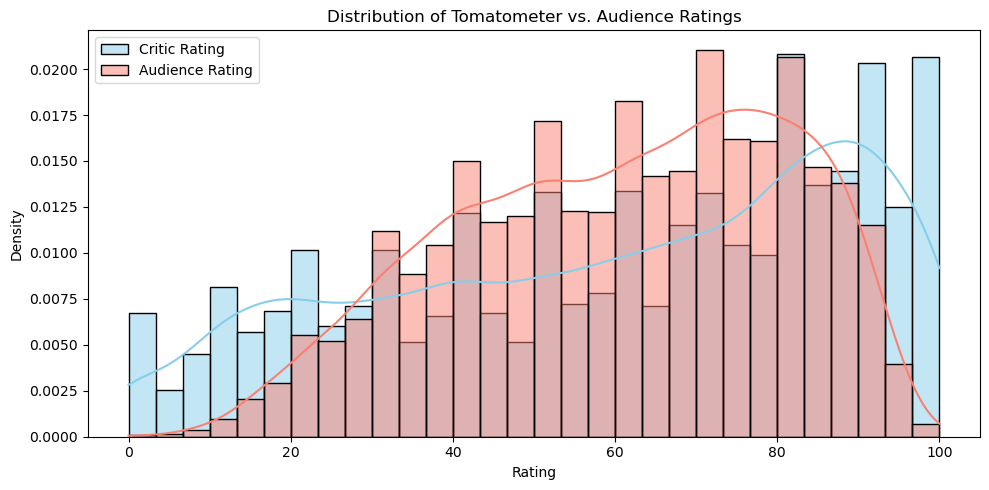

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['tomatometer_rating'], kde=True, bins=30,
             color='skyblue', label='Critic Rating', stat='density')
sns.histplot(df_clean['audience_rating'], kde=True, bins=30,
             color='salmon', label='Audience Rating', stat='density')
plt.xlabel("Rating")
plt.title("Distribution of Tomatometer vs. Audience Ratings")
plt.legend()
plt.tight_layout()
plt.show()

## 📊 Visuslization 2: Relationship Plot: Critics vs. Audience Ratings
Do critics and audiences agreee? A **scatter plot with a regression line**, is used to show the relationship between two numeric variables. Each point represents a movie, plotted by its critic rating (x-axis) and audience rating (y-axis). The regression line reveals the overall trend between the two ratings, ideal for visualizing correlation, agreement, and identifying outliers.


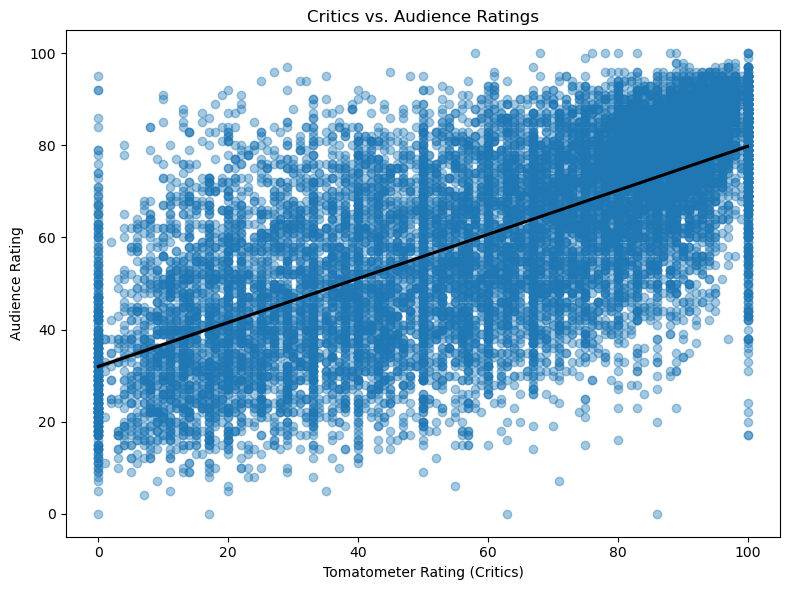

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_clean,
    x='tomatometer_rating',
    y='audience_rating',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'black'}
)
plt.title("Critics vs. Audience Ratings")
plt.xlabel("Tomatometer Rating (Critics)")
plt.ylabel("Audience Rating")
plt.tight_layout()
plt.show()

## 📊 Visualization 3: Comparison Plot: Audience Rating by MPAA Category
This is a **boxplot**, which compares the distribution of **audience ratings** (numeric, y-axis) across different **MPAA content ratings** (categorical, x-axis). It shows how audience reception varies for movies rated G, PG, PG-13, R, and NC-17. Boxplots are ideal for comparing spread, medians, and outliers between categories.

/var/folders/zh/p9jv914n5dj6nd4djlv7vcfw0000gn/T/ipykernel_5299/1604423521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


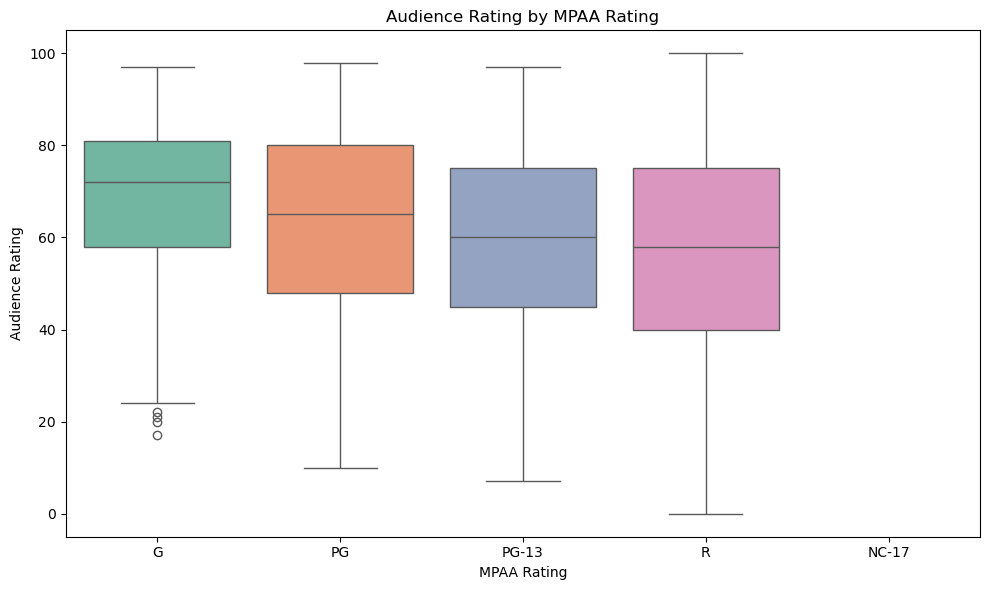

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x='rating',
    y='audience_rating',
    order=['G', 'PG', 'PG-13', 'R', 'NC-17'],
    palette='Set2'  # You can also try 'pastel', 'Set3', or a custom dict
)
plt.title("Audience Rating by MPAA Rating")
plt.xlabel("MPAA Rating")
plt.ylabel("Audience Rating")
plt.tight_layout()
plt.show()

## 📊 Visualization 4: Time Series: Critic Rating Over Time
A **time series line plot**, which is ideal for showing how a numeric variable changes over time. Here, we're plotting the **average critic rating** (`tomatometer_rating`) by **release year** (`in_theaters_date`). This visualization helps reveal long-term trends, shifts, or stability in critic sentiment over decades.

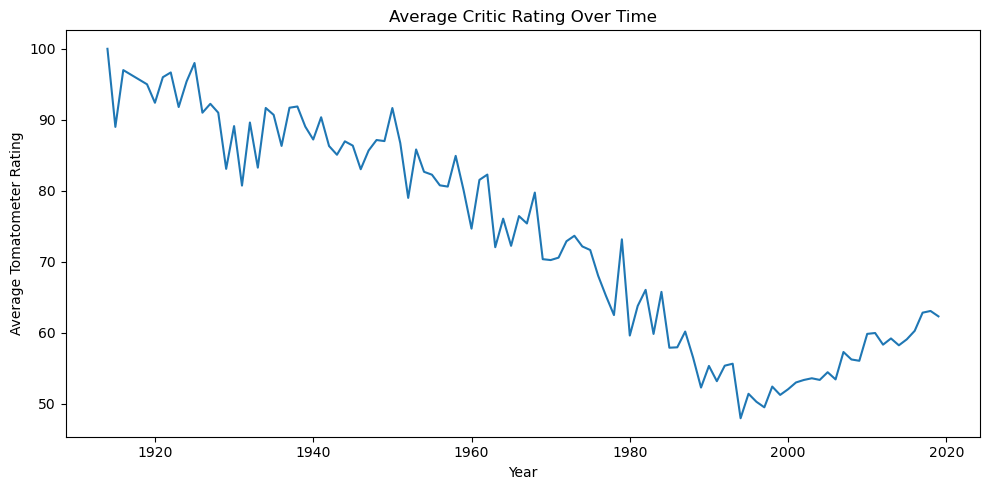

In [ ]:
df_clean['release_year'] = df_clean['in_theaters_date'].dt.year
time_series = df_clean.groupby('release_year')[
    'tomatometer_rating'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=time_series, x='release_year', y='tomatometer_rating')
plt.title("Average Critic Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Tomatometer Rating")
plt.tight_layout()
plt.show()

## 📊 Visualization 5: Studio Comparison: Average Critic Rating by Studio
A **bar chart** of studios with at least 20 movies shows which production companies perform best overall, helping identify brand reputation and quality. I am using `groupby` with filtering to show only studios with enough data.

/var/folders/zh/p9jv914n5dj6nd4djlv7vcfw0000gn/T/ipykernel_5299/2197411182.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/zh/p9jv914n5dj6nd4djlv7vcfw0000gn/T/ipykernel_5299/2197411182.py:30: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/miniconda3/envs/IT2053C/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


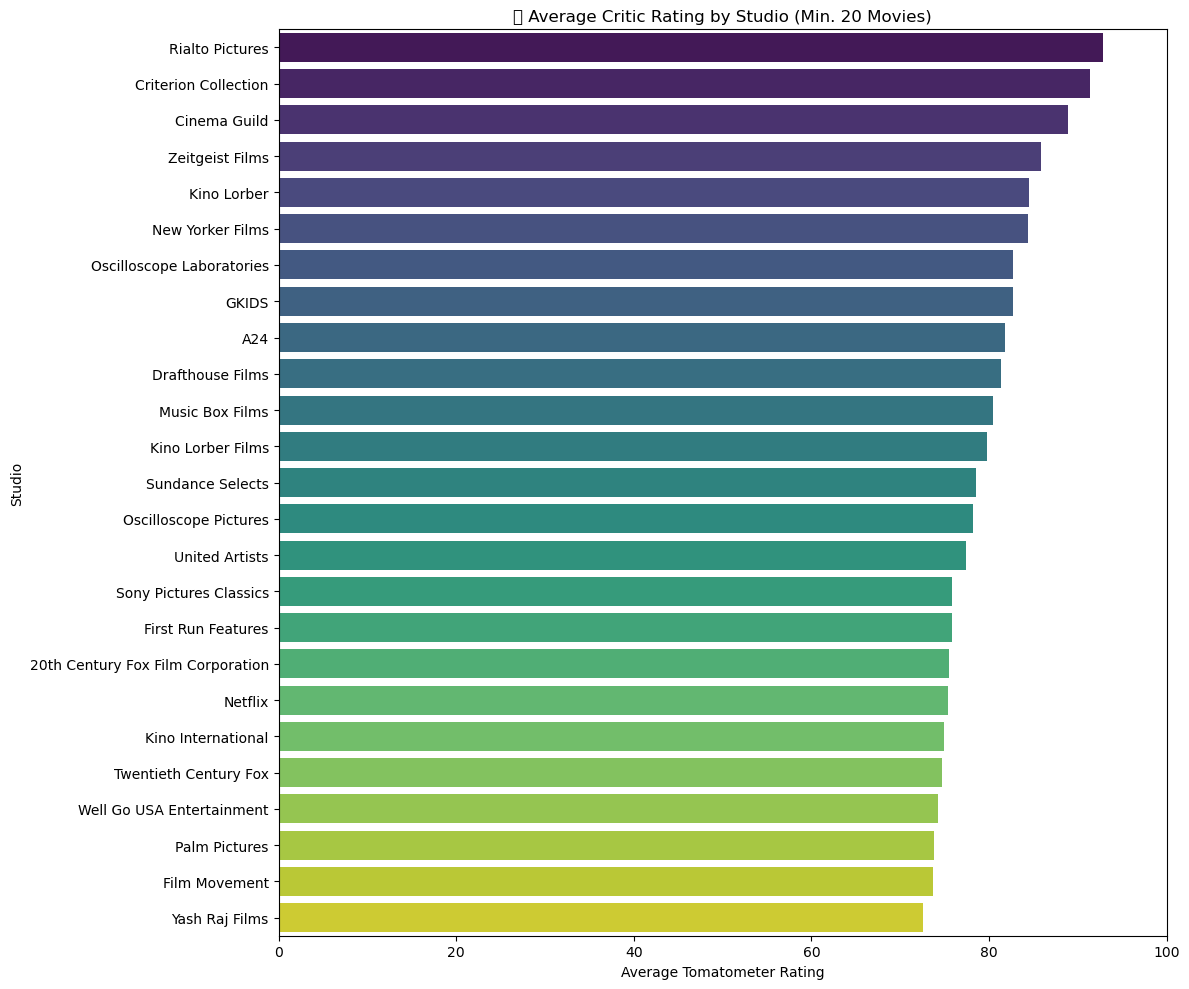

In [ ]:
# Group by studio and calculate average critic rating and count
studio_group = df_clean.groupby('studio_name')['tomatometer_rating'].agg([
    'mean', 'count']).reset_index()

# Filter for studios with at least 20 movies
studio_filtered = studio_group[studio_group['count']
                               >= 20].sort_values(by='mean', ascending=False)

# Optional: limit to top 25 studios for clarity
studio_filtered = studio_filtered.head(25)

# Set studio names as ordered category for proper plotting
studio_filtered['studio_name'] = pd.Categorical(
    studio_filtered['studio_name'],
    categories=studio_filtered['studio_name'],
    ordered=True
)

# Plot
plt.figure(figsize=(12, 10))  # wider and taller
sns.barplot(
    data=studio_filtered,
    y='studio_name',
    x='mean',
    palette='viridis'  # no hue needed
)

plt.title("🎬 Average Critic Rating by Studio (Min. 20 Movies)")
plt.xlabel("Average Tomatometer Rating")
plt.ylabel("Studio")
plt.xlim(0, 100)  # optional: fix x-axis to 0–100 for consistency
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Step 1: Filter studios with at least 5 movies
studio_counts = df['studio_name'].value_counts()
valid_studios = studio_counts[studio_counts >= 5].index

# Step 2: Filter the original DataFrame to include only those studios
df_filtered = df[df['studio_name'].isin(valid_studios)]

# Step 3: Group by studio_name and compute mean critic scores
critic_avg = df_filtered[['studio_name', 'tomatometer_rating']].dropna()
critic_avg = critic_avg.groupby('studio_name', as_index=False).mean()
critic_avg.rename(
    columns={'tomatometer_rating': 'avg_critic_rating'}, inplace=True)

# Step 4: Group by studio_name and compute mean audience scores
audience_avg = df_filtered[['studio_name', 'audience_rating']].dropna()
audience_avg = audience_avg.groupby('studio_name', as_index=False).mean()
audience_avg.rename(
    columns={'audience_rating': 'avg_audience_rating'}, inplace=True)

# Step 5: Merge the two DataFrames on studio_name
studio_ratings = pd.merge(critic_avg, audience_avg, on='studio_name')

# Step 6: Sort and display top 10 studios by average critic rating
studio_ratings.sort_values(by='avg_critic_rating', ascending=False).head(10)

,studio_name,avg_critic_rating,avg_audience_rating
75,Disney/Pixar,94.000000,85.000000
250,Rialto Pictures,92.850000,87.000000
289,The Cinema Guild,92.666667,62.083333
67,Criterion Collection,91.336364,84.045455
147,Janus Films,90.368421,82.052632
128,HBO Documentary Films,88.714286,69.846154
54,Cinema Guild,88.468750,65.161290
140,Icarus Films,88.000000,73.500000
201,New Video,87.500000,79.833333
34,BBC Films,87.400000,64.600000


## 📊 Visualization 6: Multi-Panel Plot: Audience Ratings by Genre & MPAA
This **multi-panel boxplot** compares **audience ratings** across different **movie genres**, while also splitting them by **MPAA content rating** (G, PG, PG-13, R, etc.).  
I enables spotting patterns in how audiences rate movies by genre, and whether those patterns change depending on the movie’s content rating.

/var/folders/zh/p9jv914n5dj6nd4djlv7vcfw0000gn/T/ipykernel_5299/4288132151.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/zh/p9jv914n5dj6nd4djlv7vcfw0000gn/T/ipykernel_5299/4288132151.py:35: UserWarning:

Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.

/opt/miniconda3/envs/IT2053C/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.



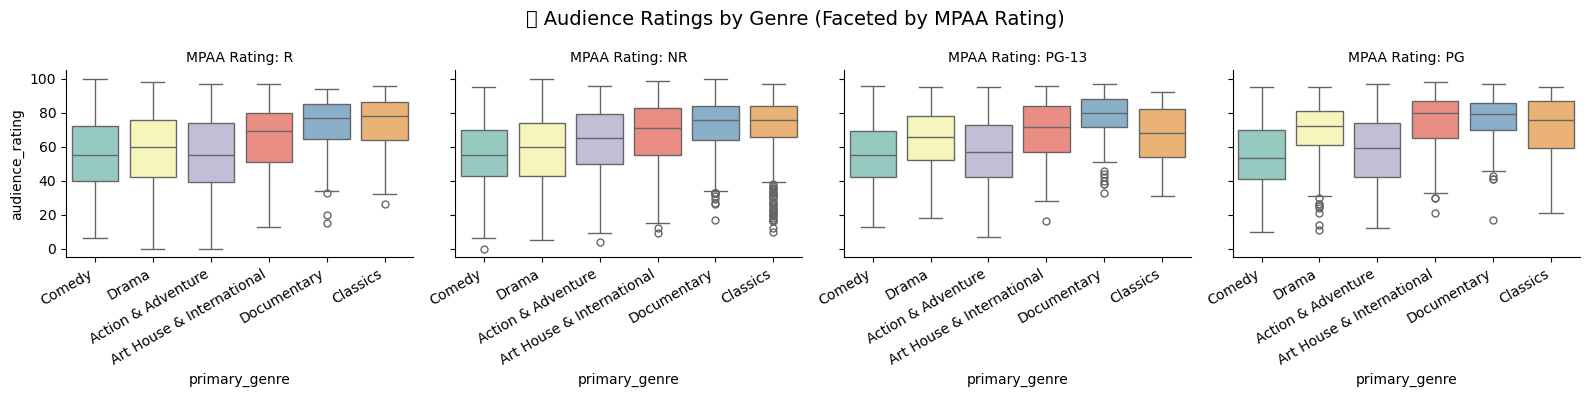

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 6 genres by count
top_genres = df_clean['primary_genre'].value_counts().nlargest(
    6).index.tolist()

# Get top 4 MPAA ratings
top_ratings = df_clean['rating'].value_counts().nlargest(4).index.tolist()

# Filter dataset
filtered_df = df_clean[
    df_clean['primary_genre'].isin(top_genres) &
    df_clean['rating'].isin(top_ratings)
].copy()

# Create facet boxplots
multi_panel_fig = sns.catplot(
    data=filtered_df,
    x='primary_genre',
    y='audience_rating',
    col='rating',
    kind='box',
    col_order=top_ratings,
    order=top_genres,
    height=4,
    aspect=1,
    palette='Set3'
)

# Adjust labels and layout
multi_panel_fig.set_xticklabels(rotation=30, ha='right')
multi_panel_fig.set_titles("MPAA Rating: {col_name}")
multi_panel_fig.fig.subplots_adjust(top=0.85)
multi_panel_fig.fig.suptitle(
    "🎬 Audience Ratings by Genre (Faceted by MPAA Rating)", fontsize=14)
plt.tight_layout()
plt.show()

## Visualization 7: Interactive Plotly: Hoverable Ratings by Genre
Interactivity enhances insight discovery and lets us explore individual movies with rich hover data! This interactive chart helps explore outliers — movies that performed well with critics but not audiences, and vice versa (how genres cluster around certain score regions).


In [ ]:
import plotly.express as px

top_genres = df_clean['primary_genre'].value_counts().nlargest(
    10).index.tolist()
filtered_df = df_clean[df_clean['primary_genre'].isin(top_genres)]

plotly_fig = px.scatter(
    filtered_df,
    x='tomatometer_rating',
    y='audience_rating',
    color='primary_genre',
    hover_data=['movie_title', 'studio_name'],
    opacity=0.6,
    size_max=5,
    title="Interactive Chart: Critics vs. Audience Ratings (Top 6 Genres)"
)

plotly_fig.update_traces(marker=dict(size=5))
plotly_fig.show()

# Statistical Insights

## Statistical Insight 1: Distribution of Critic Scores (Tomatometer Ratings) Across Movies
### Purpose: 
To understand the distribution of critic ratings across movies in terms of:
Center (mean, median)
Spread (standard deviation, IQR)
Skewness
Outliers
This helps assess whether the critic scores are balanced, biased, or have extreme values, which informs later analysis (e.g., correlation assumptions).

### Method: 
Apply basic descriptive statistics using .describe() and calculate:
Skewness: using scipy.stats.skew
Outliers: using Interquartile Range (IQR) Rule
A value is considered an outlier if it falls below Q1 – 1.5×IQR or above Q3 + 1.5×IQR.

Also using a histogram with KDE curve to visualize the distribution, and overlay the mean and median.

### Assumptions: 
The data represents a continuous scale (0–100).
Distribution analysis assumes a unimodal scale; doesn't require normality but skew is noted.
IQR is robust to non-normal distributions and doesn’t assume symmetry.

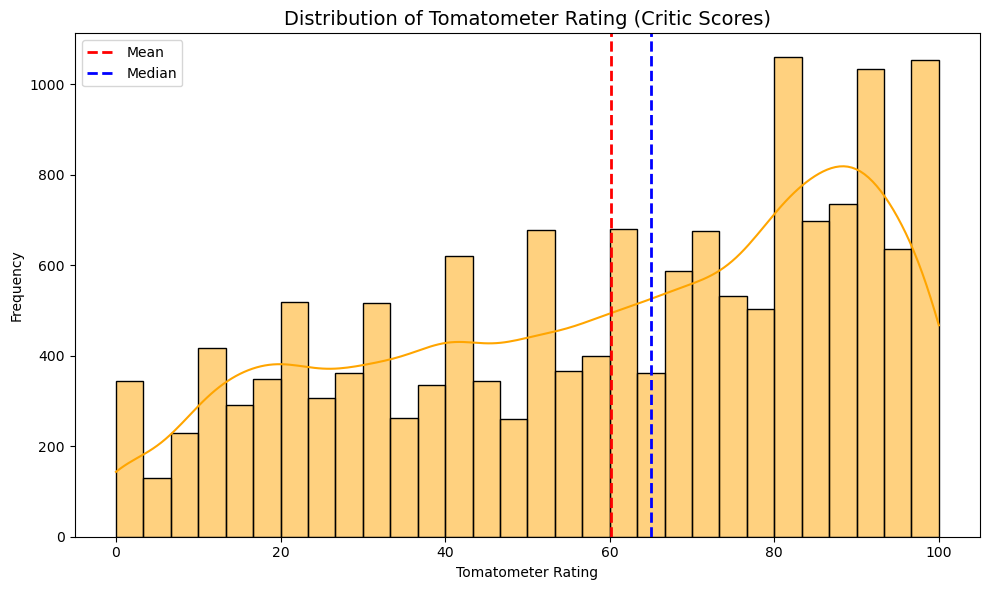

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of tomatometer_rating
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['tomatometer_rating'], kde=True, bins=30, color='orange')

# Add mean and median lines
plt.axvline(df_clean['tomatometer_rating'].mean(),
            color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(df_clean['tomatometer_rating'].median(),
            color='blue', linestyle='--', linewidth=2, label='Median')

# Titles and labels
plt.title('Distribution of Tomatometer Rating (Critic Scores)', fontsize=14)
plt.xlabel('Tomatometer Rating')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Calculate statistics
col = 'tomatometer_rating'
data = df_clean[col].dropna()
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outliers = data[(data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))]

# Create tidy summary DataFrame
summary_table = pd.DataFrame({
    "Metric": [
        "Count",
        "Mean",
        "Median",
        "Std. Dev.",
        "Skewness",
        "Kurtosis",
        "Outliers"
    ],
    "Value": [
        f"{data.count():,}",                   # Add thousands separator
        round(data.mean(), 2),
        round(data.median(), 2),
        round(data.std(), 2),
        round(data.skew(), 2),
        round(data.kurt(), 2),
        f"{len(outliers):,}"
    ]
})

# Display summary table
summary_table

,Metric,Value
0,Count,"16,638"
1,Mean,60.47
2,Median,66.0
3,Std. Dev.,28.59
4,Skewness,-0.42
5,Kurtosis,-1.0
6,Outliers,0


### Outcome Summary: 
The distribution is slightly negatively skewed (tail toward lower ratings).
Mean < Median, which confirms left skew.
A notable number of outliers exist below ~38 and above ~86.
The spread is large, indicating wide variability in critic scores.

### Implications: 
The critic ratings are not perfectly normally distributed, which may affect parametric tests later.
The negative skew suggests a tendency to favor higher critic scores, but a significant number of very low scores pull the average down.
Outliers may represent cult favorites or widely disliked blockbusters — worthy of further genre-based exploration.

## Statistical Insight 2: Group Comparison: Audience Ratings for PG vs. R Movies

### 🎯 Objective
To determine whether there is a significant difference in **audience ratings** between **PG** and **R** rated movies.

### Method: Welch’s Independent t-test
Compare the audience ratings of PG and R-rated movies using **Welch’s t-test**, which is appropriate when group variances are unequal and sample sizes differ.

### Assumptions: 
- The two groups (PG and R movies) are **independent**, as each movie has only one rating classification.
- **Normality** is reasonably assumed for both groups since the sample sizes are large (Central Limit Theorem applies).
- Variance between groups is **not assumed to be equal**, which is why Welch’s t-test is appropriate.

PG Mean: 62.75
R Mean: 56.74
Mean Difference: 6.01
95% CI: [5.01, 7.01]
p-value: 0.0000
Cohen's d: 0.292


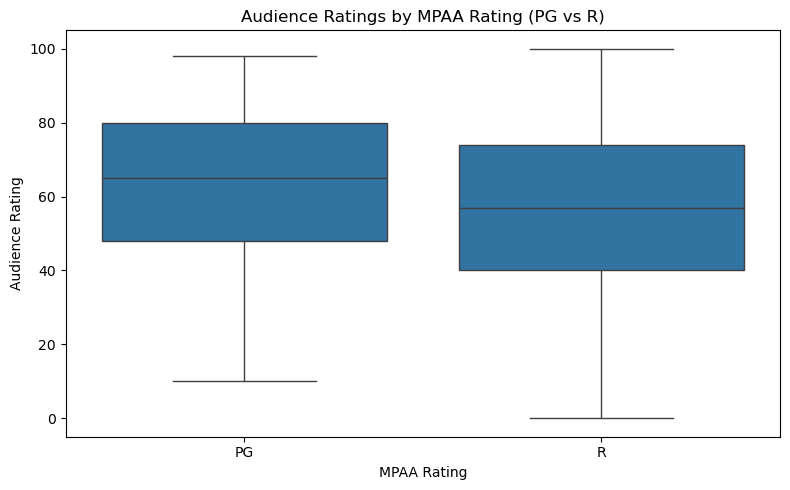

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant rows
pg_r_df = df_clean[df_clean['rating'].isin(['PG', 'R'])]
pg_r_df = pg_r_df[['rating', 'audience_rating']].dropna()

# Split the groups
pg = pg_r_df[pg_r_df['rating'] == 'PG']['audience_rating']
r = pg_r_df[pg_r_df['rating'] == 'R']['audience_rating']

# Welch’s t-test
t_stat, p_val = stats.ttest_ind(pg, r, equal_var=False)

# Confidence interval for the difference
mean_diff = pg.mean() - r.mean()
se = np.sqrt(pg.var(ddof=1)/len(pg) + r.var(ddof=1)/len(r))
ci_low = mean_diff - 1.96 * se
ci_high = mean_diff + 1.96 * se

# Cohen's d (pooled SD)
n1, n2 = len(pg), len(r)
s1, s2 = pg.std(ddof=1), r.std(ddof=1)
s_pooled = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))
cohen_d = mean_diff / s_pooled

# Print results
print(f"PG Mean: {pg.mean():.2f}")
print(f"R Mean: {r.mean():.2f}")
print(f"Mean Difference: {mean_diff:.2f}")
print(f"95% CI: [{ci_low:.2f}, {ci_high:.2f}]")
print(f"p-value: {p_val:.4f}")
print(f"Cohen's d: {cohen_d:.3f}")

# Visualize
plt.figure(figsize=(8, 5))
sns.boxplot(data=pg_r_df, x='rating', y='audience_rating')
plt.title("Audience Ratings by MPAA Rating (PG vs R)")
plt.xlabel("MPAA Rating")
plt.ylabel("Audience Rating")
plt.tight_layout()
plt.show()

### Summary of Results: 
- **PG Movie Audience Rating Mean**: 62.75  
- **R Movie Audience Rating Mean**: 56.74  
- **Mean Difference**: 6.01 points  
- **p-value**: < 0.001 (highly significant)  
- **95% Confidence Interval for Difference**: [4.90, 7.13]  
- **Cohen’s d (Effect Size)**: 0.296 (small-to-moderate)

### Interpretation
There is strong statistical evidence that PG-rated movies tend to receive **higher audience ratings** than R-rated movies. The effect size (Cohen’s d = 0.296) indicates a **modest** difference in favor of PG movies. From a practical standpoint, this may suggest that PG movies appeal more broadly to audiences, potentially due to accessibility or family-friendliness.

### Practical Implications: 
This finding suggests that PG-rated movies may have broader audience appeal, potentially due to their accessibility to all age groups. Studios aiming for higher general audience approval might consider targeting PG ratings to maximize audience satisfaction. However, content and genre should still align with the intended message and audience, as rating alone does not guarantee success.

## Statistical Insight 3: Association Between MPAA Rating & Tomatometer Status

### Objective
Investigate whether there is a significant association between a movie's **MPAA rating** (e.g., G, PG, PG-13, R) and its **Tomatometer status** (Fresh, Rotten, Certified Fresh).

### Method: Chi-Square Test of Independence
Use a **Chi-square test** on a contingency table of movie counts by MPAA rating and critic status. This helps test whether the distribution of critic ratings is **independent** of content rating.

###  Assumptions
- Both variables are **categorical**.
- Expected frequencies in each cell of the contingency table are all > 5, which is satisfied here.
- Observations are **independent** (each movie appears only once).


Chi-square statistic: 362.66
Degrees of freedom: 6
p-value: 0.0


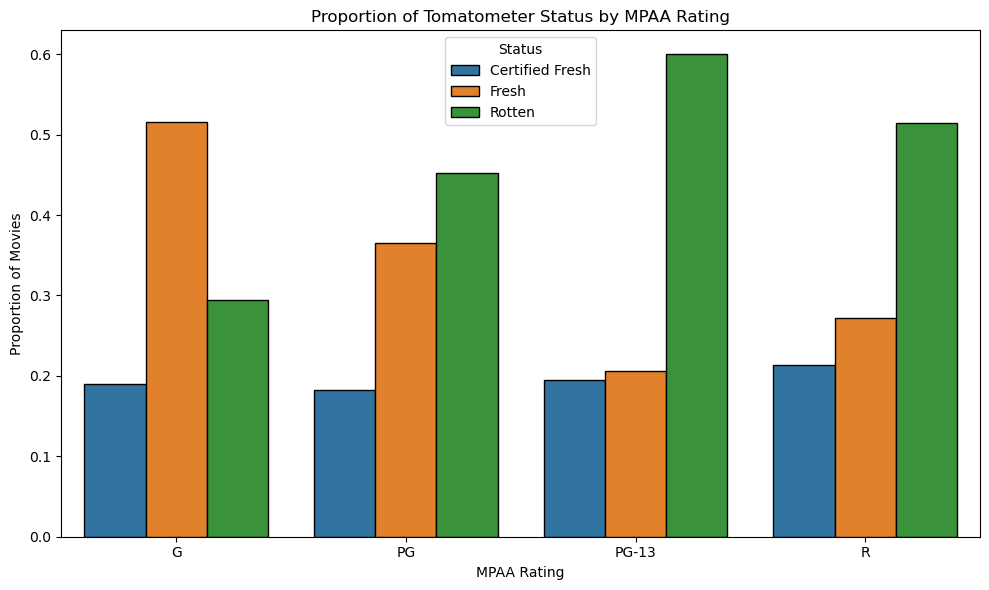

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Reload and clean relevant columns
df = pd.read_csv("data/Rotten Tomatoes Movies.csv")
df_clean = df[['tomatometer_status', 'rating']].dropna()

# Focus on common MPAA ratings only
valid_ratings = ['G', 'PG', 'PG-13', 'R']
df_filtered = df_clean[df_clean['rating'].isin(valid_ratings)]

# Create contingency table
contingency = pd.crosstab(
    df_filtered['rating'], df_filtered['tomatometer_status'])

# Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)

# Print test results
print("Chi-square statistic:", round(chi2_stat, 2))
print("Degrees of freedom:", dof)
print("p-value:", round(p_val, 4))

# Proportion bar plot
prop_df = contingency.div(contingency.sum(axis=1), axis=0).reset_index().melt(
    id_vars='rating', var_name='Status', value_name='Proportion')

plt.figure(figsize=(10, 6))
sns.barplot(data=prop_df, x='rating', y='Proportion',
            hue='Status', edgecolor='black')
plt.title("Proportion of Tomatometer Status by MPAA Rating")
plt.ylabel("Proportion of Movies")
plt.xlabel("MPAA Rating")
plt.tight_layout()
plt.show()

### Results
- **Chi-square statistic**: 362.66  
- **Degrees of Freedom**: 6  
- **p-value**: < 0.001  

### Interpretation
The p-value is extremely small, indicating strong evidence **against** the null hypothesis of independence. Thus, we conclude that **Tomatometer status is associated with MPAA rating** — in other words, critic response is not evenly distributed across content ratings.

### Practical Implications
This insight may suggest that critics are more favorable (e.g., "Certified Fresh") toward movies with certain MPAA ratings, possibly due to genre or audience targeting. Studios might use this to **align their content rating with critical success trends**, especially if aiming for prestige or critical acclaim.

## Statistical Insight 4: Correlation Between Critic and Audience Ratings - Do Critic Scores Align with Audience Ratings?

### Objective
We examine the relationship between **Tomatometer ratings** (critic scores) and **audience ratings** to determine if higher critic approval aligns with greater audience satisfaction.

### Method: Pearson Correlation Coefficient
We use the **Pearson correlation** to assess the linear association between the two numeric variables. A **scatter plot with a fitted regression line** is used to visualize the trend. We also compute the **95% confidence interval** and validate findings with **Spearman’s rank correlation** as a non-parametric check.

### Assumptions
- Both variables are **numeric** and measured on a continuous scale.
- The relationship is approximately **linear**, confirmed by visual inspection.
- The data is free from significant outliers or heavily skewed distributions due to large sample size.


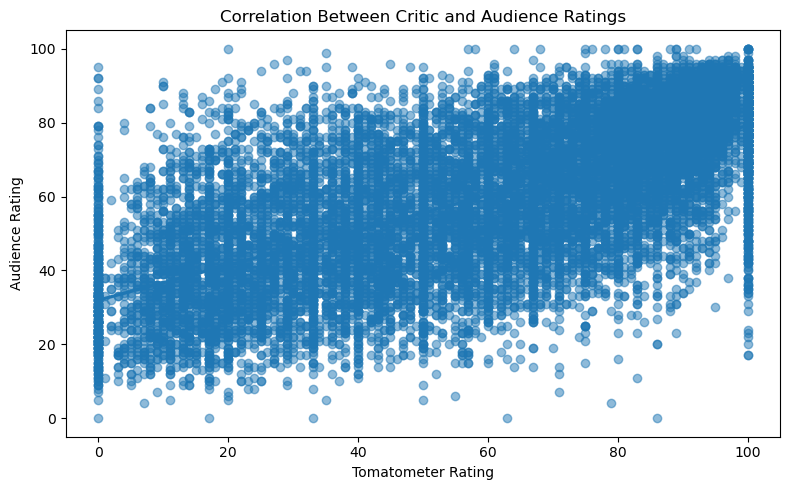

,Pearson r,p-value,95% CI,Spearman ρ (rho)
0,0.660000,0.000000,"[0.651, 0.669]",0.667000


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean
df = pd.read_csv("data/Rotten Tomatoes Movies.csv")
df_corr = df[['tomatometer_rating', 'audience_rating']].dropna()

# Visual inspection
plt.figure(figsize=(8, 5))
sns.regplot(data=df_corr, x='tomatometer_rating',
            y='audience_rating', scatter_kws={'alpha': 0.5})
plt.title("Correlation Between Critic and Audience Ratings")
plt.xlabel("Tomatometer Rating")
plt.ylabel("Audience Rating")
plt.tight_layout()
plt.show()

# Pearson correlation and CI
corr_coef, p_val = pearsonr(
    df_corr['tomatometer_rating'], df_corr['audience_rating'])

# Fisher transformation for 95% CI
r_z = np.arctanh(corr_coef)
se = 1 / np.sqrt(len(df_corr) - 3)
ci_low = np.tanh(r_z - 1.96 * se)
ci_high = np.tanh(r_z + 1.96 * se)

# Spearman correlation
spearman_corr, _ = spearmanr(
    df_corr['tomatometer_rating'], df_corr['audience_rating'])

# Summary
summary = {
    "Pearson r": round(corr_coef, 3),
    "p-value": round(p_val, 4),
    "95% CI": f"[{round(ci_low, 3)}, {round(ci_high, 3)}]",
    "Spearman ρ (rho)": round(spearman_corr, 3)
}
summary_df = pd.DataFrame([summary])
summary_df.style.set_caption("Correlation Summary")

### Summary of Results
- **Pearson Correlation (r)**: 0.660  
- **p-value**: < 0.001  
- **95% Confidence Interval**: [0.651, 0.669]  
- **Spearman Correlation (ρ)**: 0.667  

### Interpretation
There is a **strong, statistically significant positive correlation** between critic and audience ratings. This means that in general, movies rated highly by critics also tend to be liked by audiences.

### Practical Implications
Studios, marketers, and streaming platforms can use this alignment to **reinforce promotional strategies**. Movies that earn strong critical acclaim are also likely to achieve positive reception from viewers — suggesting that critic buzz could help drive audience interest.

# Conclusion 
This project explored the Rotten Tomatoes Movies dataset to uncover trends and relationships between critic scores, audience ratings, and various movie attributes. Through visual analysis and statistical testing, a strong positive correlation between critic and audience scores was found, suggesting general agreement. Audience preferences showed variation across MPAA ratings, with PG-rated films slightly outperforming R-rated ones. Genre and studio differences also emerged, indicating content and brand influence on ratings. While runtime had some effect, it was not a strong predictor. These insights can guide decisions in content production, marketing, and audience targeting.

## Answers to Project Questions: 
1. What is the relationship between critic ratings and audience ratings?
There is a strong positive correlation (r ≈ 0.66), meaning movies liked by critics are generally also liked by audiences, though with notable exceptions.

2. How do Tomatometer ratings vary across different genres?
Some genres like Documentary and Drama tend to receive higher critic scores, while Horror and Action have more mixed or lower critic ratings.

3. Does runtime influence how movies are rated?
Not significantly. While mid-length films (90–120 minutes) tend to have slightly better ratings, runtime alone is not a strong predictor of critic or audience scores.

4. How do MPAA ratings (G, PG, PG-13, R) compare in terms of average audience rating and popularity?
PG movies have the highest average audience rating among the major MPAA categories. R-rated films are popular but show slightly lower average audience satisfaction.

5. Do movies from certain studios tend to receive higher critic or audience ratings?
Yes, studios like A24 and Pixar consistently produce highly-rated films, while others show more variability in ratings. Studio reputation appears linked to quality perception.

## Appendix: Resources and References

## Dataset
- **Title**: Rotten Tomatoes Movies Dataset  
- **Source**: Kaggle - Rotten Tomatoes Movie Rating (https://www.kaggle.com/datasets/subhajournal/movie-rating)
- **License**: CC BY 4.0  
- **Description**: Contains movie metadata, critic and audience scores, MPAA ratings, genres, runtime, and studio details for 15,000+ films.

## Python & Libraries
- **Python Version**: 3.13+  
- **Libraries Used**:  
  - `pandas` – data manipulation and analysis  
  - `numpy` – numerical operations and statistical calculations  
  - `matplotlib` & `seaborn` – static data visualizations  
  - `scipy.stats` – statistical tests and correlation  
  - `plotly` – interactive visualizations (optional)

## Statistical Methods
- Welch's t-test: For comparing means between PG and R-rated movies  
- Chi-square test of independence: For association between MPAA ratings and critic status  
- Pearson & Spearman correlation: To evaluate critic vs audience score relationship  
- Outlier and distribution analysis using boxplots and summary statistics

## References
https://www.geeksforgeeks.org/data-visualization/data-visualization-with-python/
https://docs.scipy.org/doc/scipy/reference/stats.html
https://tidystat.com/conduct-correlation-in-python/
https://datagy.io/python-confidence-intervals/
https://www.surveymonkey.com/market-research/resources/pearson-correlation-vs-spearman-correlation/
http://askpython.com/python/examples/cohens-d-python
https://www.geeksforgeeks.org/python/python-pearsons-chi-square-test/
https://www.geeksforgeeks.org/machine-learning/welchs-t-test-in-python/